In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from IPython import display
import utils.utils
from data.load_dataset import load_data

## Instancier le jeu de données

In [2]:
X, y, cat_features = load_data().get_data_X_y(data='simplify')

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Forêt aléatoire

In [4]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy sur l'ensemble de test: {accuracy:.2%}")
print(classification_report(y_test, y_pred))

accuracy sur l'ensemble de test: 90.17%
              precision    recall  f1-score   support

           0       0.92      0.82      0.86       414
           1       0.89      0.95      0.92       675

    accuracy                           0.90      1089
   macro avg       0.91      0.89      0.89      1089
weighted avg       0.90      0.90      0.90      1089



## Optimisation du modèle

In [5]:
# Les hyperparamètres a tester
param_grid = {
    'n_estimators': [100, 300, 600, 1000],
    'max_depth': [7, 10, 15, 20, 25], 
    'max_features':  [None, 'sqrt', 0.2, 0.3, 0.4, 0.5], 
    'criterion': ['gini', 'entropy'] 
}

rf = RandomForestClassifier(random_state=42)


rf_grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5, 
    verbose=2,
    n_jobs=-1,
    scoring='f1'
)

rf_grid.fit(X_train, y_train)


resultats = {
    'n_estimators': [],
    'max_depth': [],
    'max_features':  [], 
    'criterion': [] 
}


best_params = rf_grid.best_params_
resultats['n_estimators'].append(best_params.get('n_estimators'))
resultats['max_depth'].append(best_params.get('max_depth'))
resultats['max_features'].append(best_params.get('max_features'))
resultats['criterion'].append(best_params.get('criterion'))


df = pd.DataFrame(resultats)
print('hyperparametres optimaux')
display.display(df)

#evaluation
best_model = rf_grid.best_estimator_
best_cv_score = rf_grid.best_score_
print(f'Moyenne des scores (f1) de validation croisé: {best_cv_score:.3f}\n')


y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy sur l'ensemble de test après optimisation: {accuracy:.2%}")

print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
hyperparametres optimaux


,n_estimators,max_depth,max_features,criterion
0,600,10,sqrt,gini


Moyenne des scores (f1) de validation croisé: 0.925

Accuracy sur l'ensemble de test après optimisation: 90.91%
              precision    recall  f1-score   support

           0       0.94      0.81      0.87       414
           1       0.89      0.97      0.93       675

    accuracy                           0.91      1089
   macro avg       0.92      0.89      0.90      1089
weighted avg       0.91      0.91      0.91      1089



## Feature Importance

In [6]:
utils.features_importance(best_model, X_train.columns, plot=False, log=False)

File features_importances.csv has been updated and saved.


,Importance
Unités curriculaires 2e semestre (approuvées),0.232599
Unités curriculaires 1er semestre (approuvées),0.161179
Unités curriculaires 2e semestre (note),0.125959
Frais de scolarité à jour,0.072136
Unités curriculaires 1er semestre (note),0.071857
Âge à l'inscription,0.032041
Unités curriculaires 2e semestre (évaluations),0.030840
Cours,0.023924
Unités curriculaires 1er semestre (évaluations),0.021686
Unités curriculaires 2e semestre (inscrits),0.020896


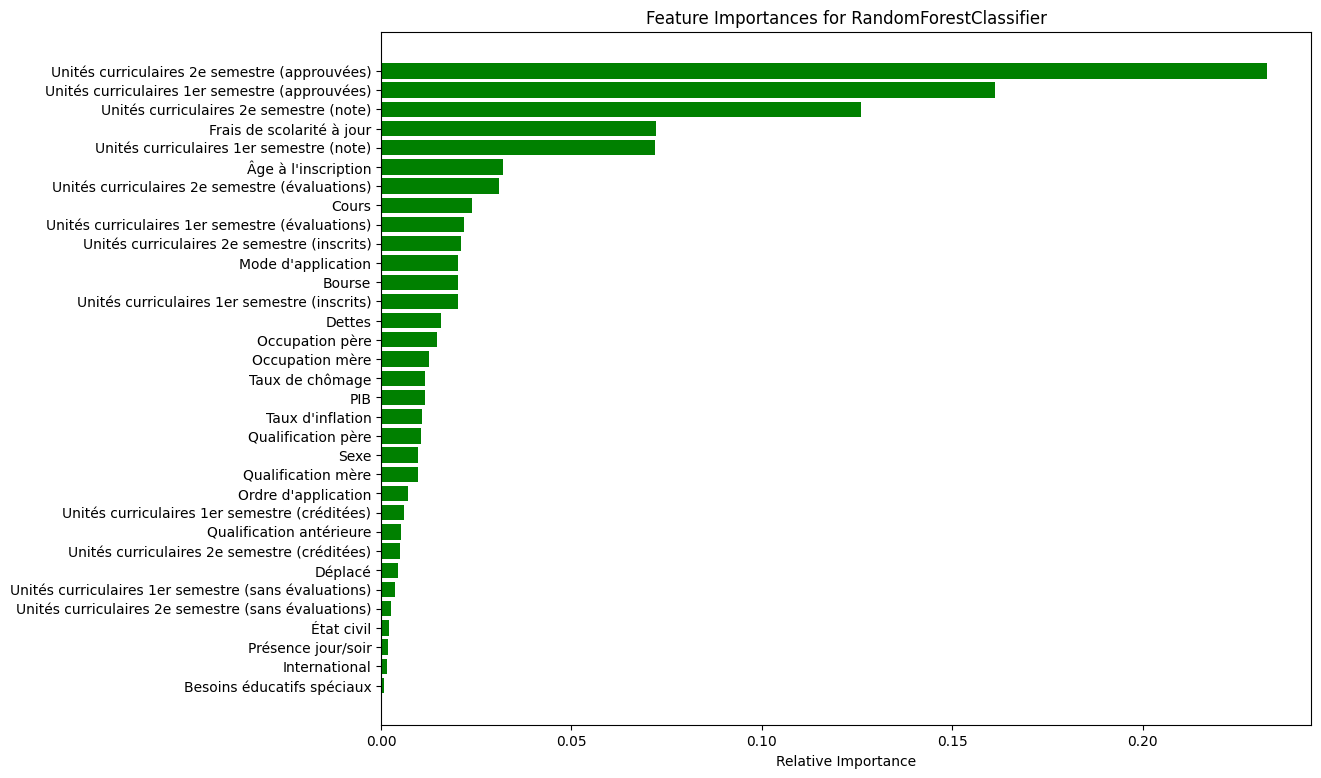

In [7]:
utils.features_importance(best_model, X_train.columns, plot=True)